In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats
from scipy.stats import binom, geom, moment, skew, kurtosis
from jupyterthemes import jtplot
jtplot.style()

## Параметры
(вариант 4)

Геометрическое – G(p), p = 0.3;

Биномиальное – Bi(m,p), m = 4, p = 0.2.

In [2]:
p = 0.3
m = 4
q = 0.2

## Основное задание
1) Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений
для этого можно использовать любой генератор БСВ (как реализованный в 1-ой лабораторной
работе, так и встроенный в язык программирования). Вывести на экран несмещенные оценки
математического ожидания и дисперсии, сравнить их с истинными значениями.

In [3]:
def print_mean_var(a, distr, *params):
    true_mean, true_var = distr.mean(*params), distr.var(*params)
    mean = np.mean(a)
    var = np.var(a, ddof=1)
    print(f'Mean: {mean:.3f}\nVariance: {var:.3f}')
    print(f'True mean: {true_mean:.3f}\nTrue variance: {true_var:.3f}')

print(f'Geometric distribution (p = {p})')
a = geom.rvs(p, size=1000)
print_mean_var(a, geom, p)

print(f'\nBinomial distribution (m = {m}, p = {q})')
b = binom.rvs(m, q, size=1000)
print_mean_var(a, binom, m, q)

Geometric distribution (p = 0.3)
Mean: 3.401
Variance: 8.719
True mean: 3.333
True variance: 7.778

Binomial distribution (m = 4, p = 0.2)
Mean: 3.401
Variance: 8.719
True mean: 0.800
True variance: 0.640


## Дополнительные задания
Для каждой из сгенерированных последовательностей:

1) Вычислить несмещенные оценки коэффициентов эксцесса и асимметрии и сравнить с
истинными значениями.

In [4]:
def print_gammas(a, distr, *params):
    gamma1 = skew(a,bias=False)
    gamma2 = kurtosis(a,bias=False)
    gamma1_true = distr.expect(lambda x: (x-distr.mean(*params))**3, params) / distr.std(*params)**3
    gamma2_true = distr.expect(lambda x: (x-distr.mean(*params))**4, params) / distr.std(*params)**4
    print(f'Skew: {gamma1:.3f}\nKurtosis: {gamma2:.3f}')
    print(f'True skew: {gamma1_true:.3f}\nTrue kurtosis: {gamma2_true:.3f}')

print('Geometric distribution')
print_gammas(a, geom, p)
print('\nBinomial distribution')
print_gammas(b, binom, m, q)

Geometric distribution
Skew: 2.973
Kurtosis: 17.456
True skew: 2.032
True kurtosis: 9.129

Binomial distribution
Skew: 0.739
Kurtosis: -0.008
True skew: 0.750
True kurtosis: 3.063


2) Построить гистограмму и сравнить с графиком теоретического распределения
вероятностей (на одном графике).

In [5]:
def plot_hist_pmf(a, pmf, *params, title=''):
    minimum = a.min()
    maximum = a.max()
    plt.figure(figsize=(10,5))
    plt.hist(a,bins=np.linspace(minimum-0.5,maximum+0.5,num=(maximum-minimum)+2))
    x = np.arange(minimum, maximum+1)
    plt.xticks(x)
    f = len(a)*pmf(x, *params)
    plt.scatter(x, f, c = 'red', zorder=5)
    #plt.vlines(x, 0, f, colors='red', lw=2, alpha=0.5)
    plt.legend(['theoretical', 'empirical'])
    plt.title(title)
    plt.show()
    
def plot_hist_cmf(a, cdf, *params, title):
    minimum = a.min()
    maximum = a.max()
    x = np.arange(minimum, maximum+1)
    f = cdf(x, *params)
    values, base = np.histogram(a,(maximum-minimum))
    cumulative = np.cumsum(values)/len(a)
    plt.figure(figsize=(10,5))
    plt.scatter(base[:-1], cumulative, c = 'RoyalBlue', alpha=0.7)
    plt.scatter(x[:-1], f[:-1], c = 'red', zorder=100, alpha=0.7)
    plt.xticks(x)
    plt.hlines(cumulative, base[:-1], base[1:], colors='RoyalBlue', lw=2, alpha=0.7)
    plt.hlines(f[:-1], x[:-1], x[1:], colors='red', lw=2, alpha=0.7)
    plt.legend(['theoretical', 'empirical'], loc='lower right')
    plt.title(title)
    plt.show()

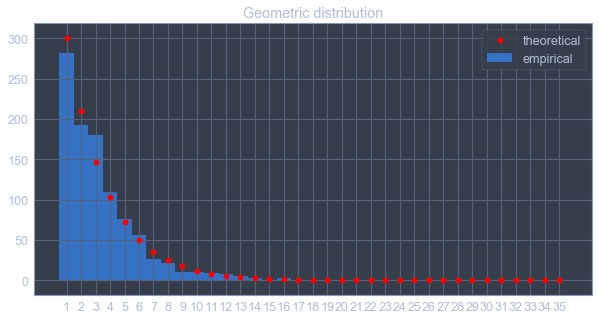

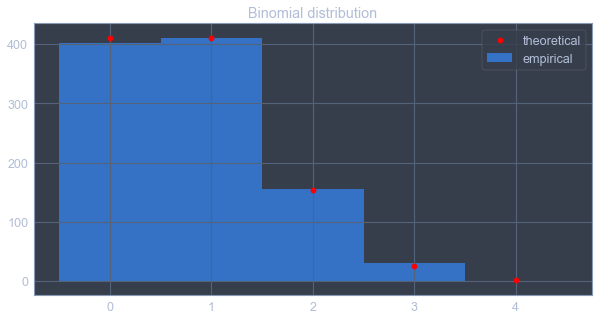

In [6]:
plot_hist_pmf(a, geom.pmf, p, title='Geometric distribution')
plot_hist_pmf(b, binom.pmf, m, q, title='Binomial distribution')

3) Построить график эмпирической функции распределения и сравнить с графиком
теоретической функции распределения.

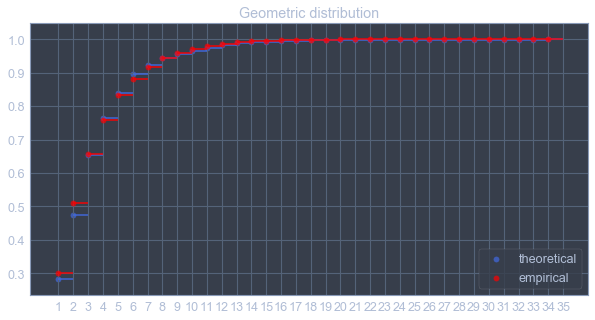

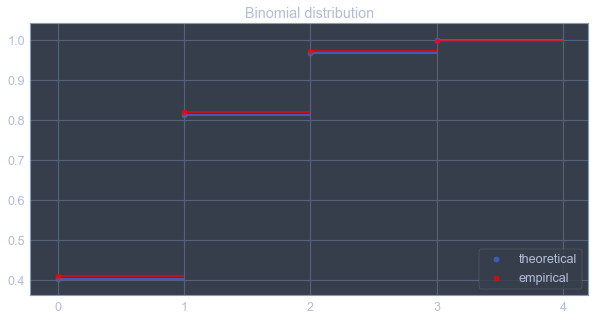

In [7]:
plot_hist_cmf(a, geom.cdf, p, title='Geometric distribution')
plot_hist_cmf(b, binom.cdf, m, q, title='Binomial distribution')

4) Реализовать критерий хи-квадрат Пирсона проверки статистической гипотезы о
принадлежности смоделированной последовательности к заданному распределению.